In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler

!pip install category_encoders
import category_encoders as ce

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn import preprocessing

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

import matplotlib.patches as mpatches

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 86 kB 2.6 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
df = pd.read_csv(r"/content/Machine Failure AML Dataset BigML.com.csv")

In [29]:
df

,Failure,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
0,No,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90
1,No,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91
2,No,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92
3,No,63,80,Operator1,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93
4,No,65,81,Operator1,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,No,66,79,Operator8,937,0,2,1875,1719,219,748,1901,819,546,901,1512,1477,537,410,7
8780,No,60,77,Operator8,379,3,0,814,1990,1606,1346,962,875,1067,608,251,1476,522,943,8
8781,No,61,77,Operator8,595,3,1,1659,1134,1314,907,1119,1623,272,1149,1951,1835,1554,200,9
8782,No,72,81,Operator8,1038,3,2,254,1400,564,216,1011,1909,502,470,1331,1696,229,1192,10


In [30]:
df.describe()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,64.026412,83.337090,1090.900387,1.489868,0.999203,1071.629895,1075.822860,1076.023793,1086.897086,1077.277209,1082.014572,1082.403005,1088.719148,1088.329349,1076.755806,1088.307377,1082.392304,217.341872
std,2.868833,4.836256,537.097769,1.115605,0.816473,536.518466,533.158826,534.004966,538.195156,537.187671,532.983115,537.582829,534.995992,533.299486,535.111353,537.264847,537.527604,151.751750
min,5.000000,65.000000,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.000000
25%,62.000000,80.000000,629.000000,0.000000,0.000000,608.750000,606.000000,623.000000,621.000000,612.000000,631.000000,619.000000,627.000000,627.000000,609.000000,617.000000,614.000000,90.000000
50%,64.000000,83.000000,1096.000000,1.000000,1.000000,1058.000000,1077.000000,1072.000000,1089.000000,1074.000000,1078.000000,1080.000000,1093.000000,1082.000000,1067.000000,1088.500000,1076.000000,195.000000
75%,66.000000,87.000000,1555.000000,2.000000,2.000000,1533.000000,1541.000000,1537.000000,1558.000000,1541.000000,1532.000000,1547.000000,1550.000000,1552.000000,1539.000000,1560.000000,1550.000000,324.000000
max,78.000000,122.000000,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,666.000000


In [31]:
df = df.drop('Operator', axis=1)

In [32]:
label_encoder = preprocessing.LabelEncoder()
df['Failure']= label_encoder.fit_transform(df['Failure'])

In [34]:
X = df.drop('Failure', axis = 1).values
y = df['Failure'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print('DecisionTreeClassifier')
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
tree_yhat = DT.predict(X_test)
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat, )))
confusion_matrix(y_test, tree_yhat, labels = [0, 1])

print('\n\n KNeighborsClassifier')
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

print('\n\nLogisticRegression')
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

print('\n\nSVC')
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))

DecisionTreeClassifier
Accuracy score of the Decision Tree model is 0.9968123861566485
F1 score of the Decision Tree model is 0.8292682926829269


 KNeighborsClassifier
Accuracy score of the K-Nearest Neighbors model is 0.9895264116575592
F1 score of the K-Nearest Neighbors model is 0.0


LogisticRegression
Accuracy score of the Logistic Regression model is 0.9949908925318761
F1 score of the Logistic Regression model is 0.6857142857142856


SVC
Accuracy score of the Support Vector Machines model is 0.9895264116575592
F1 score of the Support Vector Machines model is 0.0


**After applying directly classifier Algorithms on imbalanced dataset, we get Accuracy of around 99% consstently for each Algorithm model. But f-1 score and recall rate are low.**

# Accuracy being High is the result of Around 99.08% of data belonging to class 0. Therefore in such case of DATA IMBALANCE, WE SHOULD NEVER USE METRIC LIKE ACCURACY FOR DECIDING Best Model.

# **Now Let's Proceed In Correct Methodolgy...**

In [39]:
df = pd.read_csv(r"/content/Machine Failure AML Dataset BigML.com.csv")

In [40]:
df

,Failure,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
0,No,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90
1,No,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91
2,No,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92
3,No,63,80,Operator1,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93
4,No,65,81,Operator1,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,No,66,79,Operator8,937,0,2,1875,1719,219,748,1901,819,546,901,1512,1477,537,410,7
8780,No,60,77,Operator8,379,3,0,814,1990,1606,1346,962,875,1067,608,251,1476,522,943,8
8781,No,61,77,Operator8,595,3,1,1659,1134,1314,907,1119,1623,272,1149,1951,1835,1554,200,9
8782,No,72,81,Operator8,1038,3,2,254,1400,564,216,1011,1909,502,470,1331,1696,229,1192,10


In [41]:
df.describe()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,64.026412,83.337090,1090.900387,1.489868,0.999203,1071.629895,1075.822860,1076.023793,1086.897086,1077.277209,1082.014572,1082.403005,1088.719148,1088.329349,1076.755806,1088.307377,1082.392304,217.341872
std,2.868833,4.836256,537.097769,1.115605,0.816473,536.518466,533.158826,534.004966,538.195156,537.187671,532.983115,537.582829,534.995992,533.299486,535.111353,537.264847,537.527604,151.751750
min,5.000000,65.000000,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.000000
25%,62.000000,80.000000,629.000000,0.000000,0.000000,608.750000,606.000000,623.000000,621.000000,612.000000,631.000000,619.000000,627.000000,627.000000,609.000000,617.000000,614.000000,90.000000
50%,64.000000,83.000000,1096.000000,1.000000,1.000000,1058.000000,1077.000000,1072.000000,1089.000000,1074.000000,1078.000000,1080.000000,1093.000000,1082.000000,1067.000000,1088.500000,1076.000000,195.000000
75%,66.000000,87.000000,1555.000000,2.000000,2.000000,1533.000000,1541.000000,1537.000000,1558.000000,1541.000000,1532.000000,1547.000000,1550.000000,1552.000000,1539.000000,1560.000000,1550.000000,324.000000
max,78.000000,122.000000,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,666.000000


In [ ]:
# The classes are heavily skewed/imbalanced, I will try to solve this issue later.

print('No Failure', round(df['Failure'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Failure', round(df['Failure'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Failure 99.08 % of the dataset
Failure 0.92 % of the dataset


Note: Notice how imbalanced is our original dataset! In Most of the cases there were no failure in machine.If we use this dataframe as the base for our predictive models and analyse it, we might get a lot of errors and our algorithms will probably overfit since it will "assume" that in most of the cases the status of the machine were no failure. But we don't want our model to assume, we want our model to detect patterns that give signs of failure.

# **Handling Data-imbalance**

Text(0.5, 1.0, 'Class Distributions \n (0: No Failure || 1: Failure)')

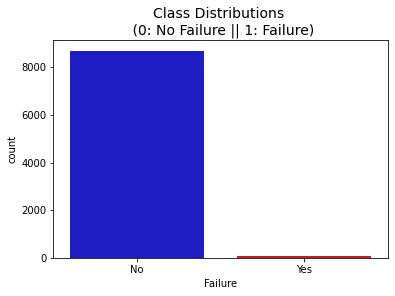

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Failure', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Failure || 1: Failure)', fontsize=14)

Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

In [ ]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Temperature'] = rob_scaler.fit_transform(df['Temperature'].values.reshape(-1,1))
df['Humidity'] = rob_scaler.fit_transform(df['Humidity'].values.reshape(-1,1))
df['Measure1'] = rob_scaler.fit_transform(df['Measure1'].values.reshape(-1,1))
df['Measure2'] = rob_scaler.fit_transform(df['Measure2'].values.reshape(-1,1))
df['Measure3'] = rob_scaler.fit_transform(df['Measure3'].values.reshape(-1,1))
df['Measure4'] = rob_scaler.fit_transform(df['Measure4'].values.reshape(-1,1))
df['Measure5'] = rob_scaler.fit_transform(df['Measure5'].values.reshape(-1,1))
df['Measure6'] = rob_scaler.fit_transform(df['Measure6'].values.reshape(-1,1))
df['Measure7'] = rob_scaler.fit_transform(df['Measure7'].values.reshape(-1,1))
df['Measure8'] = rob_scaler.fit_transform(df['Measure8'].values.reshape(-1,1))
df['Measure9'] = rob_scaler.fit_transform(df['Measure9'].values.reshape(-1,1))
df['Measure10'] = rob_scaler.fit_transform(df['Measure10'].values.reshape(-1,1))
df['Measure11'] = rob_scaler.fit_transform(df['Measure11'].values.reshape(-1,1))
df['Measure12'] = rob_scaler.fit_transform(df['Measure12'].values.reshape(-1,1))
df['Measure13'] = rob_scaler.fit_transform(df['Measure13'].values.reshape(-1,1))
df['Measure14'] = rob_scaler.fit_transform(df['Measure14'].values.reshape(-1,1))
df['Measure15'] = rob_scaler.fit_transform(df['Measure15'].values.reshape(-1,1))
df['Hours Since Previous Failure'] = rob_scaler.fit_transform(df['Hours Since Previous Failure'].values.reshape(-1,1))

In [ ]:
df['Operator']

0       Operator1
1       Operator1
2       Operator1
3       Operator1
4       Operator1
          ...    
8779    Operator8
8780    Operator8
8781    Operator8
8782    Operator8
8783    Operator8
Name: Operator, Length: 8784, dtype: object

In [ ]:
Operator1NoFail = 0
Operator1Fail = 0
Operator2NoFail = 0
Operator2Fail = 0
Operator3NoFail = 0
Operator3Fail = 0
Operator4NoFail = 0
Operator4Fail = 0
Operator5NoFail = 0
Operator5Fail = 0
Operator6NoFail = 0
Operator6Fail = 0
Operator7NoFail = 0
Operator7Fail = 0
Operator8NoFail = 0
Operator8Fail = 0


for i in range(0,8784):
  if(df['Operator'][i]=="Operator1" and df['Failure'][i]=="No"):
    Operator1NoFail = Operator1NoFail + 1
  elif(df['Operator'][i]=="Operator1" and df['Failure'][i]=="Yes"):
    Operator1Fail = Operator1Fail + 1
  elif(df['Operator'][i]=="Operator2" and df['Failure'][i]=="No"):
    Operator2NoFail = Operator2NoFail + 1
  elif(df['Operator'][i]=="Operator2" and df['Failure'][i]=="Yes"):
    Operator2Fail = Operator2Fail + 1
  elif(df['Operator'][i]=="Operator3" and df['Failure'][i]=="No"):
    Operator3NoFail = Operator3NoFail + 1
  elif(df['Operator'][i]=="Operator3" and df['Failure'][i]=="Yes"):
    Operator3Fail = Operator3Fail + 1
  elif(df['Operator'][i]=="Operator4" and df['Failure'][i]=="No"):
    Operator4NoFail = Operator4NoFail + 1
  elif(df['Operator'][i]=="Operator4" and df['Failure'][i]=="Yes"):
    Operator4Fail = Operator4Fail + 1
  elif(df['Operator'][i]=="Operator5" and df['Failure'][i]=="No"):
    Operator5NoFail = Operator5NoFail + 1
  elif(df['Operator'][i]=="Operator5" and df['Failure'][i]=="Yes"):
    Operator5Fail = Operator5Fail + 1
  elif(df['Operator'][i]=="Operator6" and df['Failure'][i]=="No"):
    Operator6NoFail = Operator6NoFail + 1
  elif(df['Operator'][i]=="Operator6" and df['Failure'][i]=="Yes"):
    Operator6Fail = Operator6Fail + 1
  elif(df['Operator'][i]=="Operator7" and df['Failure'][i]=="No"):
    Operator7NoFail = Operator7NoFail + 1
  elif(df['Operator'][i]=="Operator7" and df['Failure'][i]=="Yes"):
    Operator7Fail = Operator7Fail + 1
  elif(df['Operator'][i]=="Operator8" and df['Failure'][i]=="No"):
    Operator8NoFail = Operator8NoFail + 1
  elif(df['Operator'][i]=="Operator8" and df['Failure'][i]=="Yes"):
    Operator8Fail = Operator8Fail + 1

print(Operator1NoFail)
print(Operator1Fail)
print(Operator2NoFail)
print(Operator2Fail)
print(Operator3NoFail)
print(Operator3Fail)
print(Operator4NoFail)
print(Operator4Fail)
print(Operator5NoFail)
print(Operator5Fail)
print(Operator6NoFail)
print(Operator6Fail)
print(Operator7NoFail)
print(Operator7Fail)
print(Operator8NoFail)
print(Operator8Fail)



966
10
1930
22
967
9
965
11
971
5
968
8
962
14
974
2


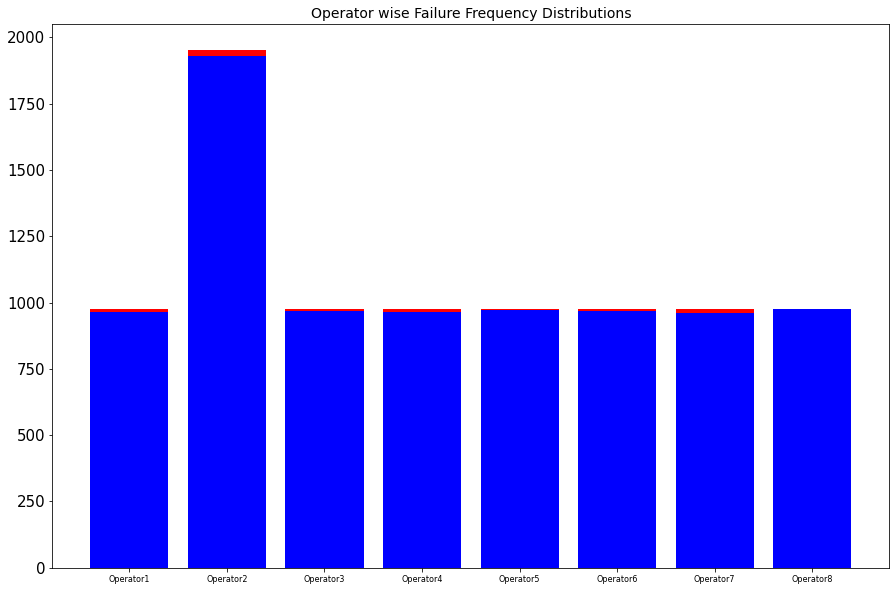

In [ ]:
x = ['Operator1', 'Operator2', 'Operator3', 'Operator4', 'Operator5', 'Operator6', 'Operator7', 'Operator8']
y1 = [Operator1NoFail, Operator2NoFail, Operator3NoFail, Operator4NoFail, Operator5NoFail, Operator6NoFail, Operator7NoFail, Operator8NoFail]
y2 = [Operator1Fail, Operator2Fail, Operator3Fail, Operator4Fail, Operator5Fail, Operator6Fail, Operator7Fail, Operator8Fail]

# plot bars in stack manner
plt.figure(figsize=(15,10))
plt.title('Operator wise Failure Frequency Distributions', fontsize=14)
plt.bar(x, y1, color='b')
plt.bar(x, y2, bottom=y1, color='r')
plt.tick_params(axis="x", labelsize=8)
plt.tick_params(axis="y", labelsize=15)

In [ ]:
df.shape

(8784, 20)

In [ ]:
df.dtypes

Failure                          object
Temperature                     float64
Humidity                        float64
Operator                         object
Measure1                        float64
Measure2                        float64
Measure3                        float64
Measure4                        float64
Measure5                        float64
Measure6                        float64
Measure7                        float64
Measure8                        float64
Measure9                        float64
Measure10                       float64
Measure11                       float64
Measure12                       float64
Measure13                       float64
Measure14                       float64
Measure15                       float64
Hours Since Previous Failure    float64
dtype: object

# **ONE HOT ENCODING**

### **I used ONE HOT ENCODING for converting Operator column's 8 different people as separate columns with 0 or 1 values. My initial guess is, It will benefit me later in classification...**

In [ ]:
encoder=ce.OneHotEncoder(cols='Operator',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df)
df_encoded

,Failure,Temperature,Humidity,Operator_Operator1,Operator_Operator3,Operator_Operator5,Operator_Operator2,Operator_Operator4,Operator_Operator6,Operator_Operator7,...,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
0,No,0.75,-0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.408751,0.012917,-0.912320,0.231681,-0.354280,-0.123243,0.126882,0.282609,0.818376,-0.448718
1,No,1.00,-0.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004269,-0.592034,-0.176471,-0.899784,-0.747562,-0.388108,0.407527,-0.391835,-0.350427,-0.444444
2,No,0.00,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.916756,0.869752,0.247503,-0.869612,0.903575,0.044324,-0.376344,0.455461,0.654915,-0.440171
3,No,-0.25,-0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066169,-0.138859,0.259711,0.446121,0.717226,0.380541,-0.607527,0.262460,-0.389957,-0.435897
4,No,0.25,-0.285714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.375667,0.712594,-0.049945,0.505388,-0.315276,0.796757,0.590323,0.443796,-0.607906,-0.431624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,No,0.50,-0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.363927,0.890205,-0.287458,-0.575431,-0.208017,0.464865,0.440860,-0.584836,-0.711538,-0.803419
8780,No,-1.00,-0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.274280,-0.120560,-0.225305,-0.014009,-0.525460,-0.898378,0.439785,-0.600742,-0.142094,-0.799145
8781,No,-0.75,-0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.194237,0.048439,0.604883,-0.870690,0.060672,0.939459,0.825806,0.493637,-0.935897,-0.794872
8782,No,2.00,-0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.931697,-0.067815,0.922309,-0.622845,-0.674973,0.269189,0.676344,-0.911453,0.123932,-0.790598


# **LABEL ENCODING of Failure state Categorical data into 0 & 1**

In [ ]:
df_encoded.dtypes

Failure                          object
Temperature                     float64
Humidity                        float64
Operator_Operator1              float64
Operator_Operator3              float64
Operator_Operator5              float64
Operator_Operator2              float64
Operator_Operator4              float64
Operator_Operator6              float64
Operator_Operator7              float64
Operator_Operator8              float64
Measure1                        float64
Measure2                        float64
Measure3                        float64
Measure4                        float64
Measure5                        float64
Measure6                        float64
Measure7                        float64
Measure8                        float64
Measure9                        float64
Measure10                       float64
Measure11                       float64
Measure12                       float64
Measure13                       float64
Measure14                       float64


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_encoded['Failure']= label_encoder.fit_transform(df_encoded['Failure'])

In [ ]:
df_encoded

,Failure,Temperature,Humidity,Operator_Operator1,Operator_Operator3,Operator_Operator5,Operator_Operator2,Operator_Operator4,Operator_Operator6,Operator_Operator7,...,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
0,0,0.75,-0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.408751,0.012917,-0.912320,0.231681,-0.354280,-0.123243,0.126882,0.282609,0.818376,-0.448718
1,0,1.00,-0.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004269,-0.592034,-0.176471,-0.899784,-0.747562,-0.388108,0.407527,-0.391835,-0.350427,-0.444444
2,0,0.00,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.916756,0.869752,0.247503,-0.869612,0.903575,0.044324,-0.376344,0.455461,0.654915,-0.440171
3,0,-0.25,-0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066169,-0.138859,0.259711,0.446121,0.717226,0.380541,-0.607527,0.262460,-0.389957,-0.435897
4,0,0.25,-0.285714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.375667,0.712594,-0.049945,0.505388,-0.315276,0.796757,0.590323,0.443796,-0.607906,-0.431624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,0,0.50,-0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.363927,0.890205,-0.287458,-0.575431,-0.208017,0.464865,0.440860,-0.584836,-0.711538,-0.803419
8780,0,-1.00,-0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.274280,-0.120560,-0.225305,-0.014009,-0.525460,-0.898378,0.439785,-0.600742,-0.142094,-0.799145
8781,0,-0.75,-0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.194237,0.048439,0.604883,-0.870690,0.060672,0.939459,0.825806,0.493637,-0.935897,-0.794872
8782,0,2.00,-0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.931697,-0.067815,0.922309,-0.622845,-0.674973,0.269189,0.676344,-0.911453,0.123932,-0.790598


## **NOTE :**
1. I am first trying to split, train & test data, without taking standardized values for various Measures !

# **What is a sub-Sample?**
In this scenario, our subsample will be a dataframe with a 50/50 ratio of failure and non-failure instances. Meaning our sub-sample will have the same amount of failure and non failure cases.

# **Why do we create a sub-Sample?**
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! 
**Using the original dataframe will cause the following issues:**

**Overfitting**: Our classification models will assume that in most cases there are no failure! What we want for our model is to be certain when a failure occurs.

**Wrong Correlations**: Although we don't know what the "Measure" features stand for, it will be useful to understand how each of this features influence the result (Failure or No Failure) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

**Summary**:

1.Scaled amount and scaled time are the columns with scaled values.

2.There are 81 cases of no failure in our dataset so we can randomly get 81 cases of non-failure to create our new sub dataframe.

3.We concat the 81 cases of failure and non failure, creating a new sub-sample.

# **Splitting the Data (Original DataFrame)**

Before proceeding with the **Random UnderSampling technique** we have to separate the orginal dataframe. **Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques.** The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [ ]:
print('No Failure', round(df_encoded['Failure'].value_counts()[0]/len(df_encoded) * 100,2), '% of the dataset')
print('Failure', round(df_encoded['Failure'].value_counts()[1]/len(df_encoded) * 100,2), '% of the dataset')

X = df_encoded.drop('Failure', axis=1)
y = df_encoded['Failure']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Failure 99.08 % of the dataset
Failure 0.92 % of the dataset
Train: [1753 1754 1755 ... 8781 8782 8783] Test: [   0    1    2 ... 1828 1829 1830]
Train: [   0    1    2 ... 8781 8782 8783] Test: [1753 1754 1755 ... 3773 3774 3775]
Train: [   0    1    2 ... 8781 8782 8783] Test: [3511 3512 3513 ... 5938 5988 6017]
Train: [   0    1    2 ... 8781 8782 8783] Test: [5264 5265 5266 ... 7025 7414 7415]
Train: [   0    1    2 ... 7025 7414 7415] Test: [7026 7027 7028 ... 8781 8782 8783]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99075128 0.00924872]
[0.99088838 0.00911162]


# **Random Under-Sampling:**


In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

**Steps:**

1.The first thing we have to do is determine how imbalanced is our 'failure status' (use "value_counts()" on the Failure column to determine the amount for each label)

2.Once we determine how many instances are considered failure (Failure = "1") , we should bring the non-failure to the same amount as failure (assuming we want a 50/50 ratio), this will be equivalent to 81 cases of failure and 81 cases of non-failure machine.

3.After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our 'failure status'. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 81 non-failure instances from 8703 non-failure instances)

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df_encoded = df_encoded.sample(frac=1)

# Selecting randomly amount of fraud classes as 81 rows out of 8703 rows for making a sub-sample
failure_df = df_encoded.loc[df_encoded['Failure'] == 1]
non_failure_df = df_encoded.loc[df_encoded['Failure'] == 0][:81]

normal_distributed_df = pd.concat([failure_df, non_failure_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

normal_distributed_df

,Failure,Temperature,Humidity,Operator_Operator1,Operator_Operator3,Operator_Operator5,Operator_Operator2,Operator_Operator4,Operator_Operator6,Operator_Operator7,...,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
3774,1,2.00,-1.714286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.544290,-0.842842,1.024417,0.971983,-0.204767,0.692973,0.170968,0.847826,-0.438034,-0.829060
515,1,1.75,-2.571429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.244397,0.383208,-0.328524,0.533405,-0.568797,-0.318919,-0.021505,-0.617709,0.795940,0.735043
8181,1,2.00,-0.857143,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.935966,-0.831001,0.167592,-0.511853,0.536295,-0.724324,-0.515054,-0.586957,0.762821,-0.829060
7512,1,2.00,-1.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.486660,0.396125,0.216426,0.747845,-0.928494,-0.505946,0.878495,-0.696182,0.075855,-0.829060
3172,1,1.00,-1.714286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.390608,-0.397201,-0.689234,-0.364224,-0.035753,0.163243,-0.077419,0.392895,0.348291,-0.824786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,0,0.00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.153682,-0.406889,0.689234,0.285560,-0.797400,-0.360000,-0.218280,-0.269883,0.833333,-0.286325
321,0,0.75,-1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.658485,0.913886,0.367370,0.538793,0.946912,-0.552432,-0.778495,0.411983,-0.393162,-0.094017
7387,0,0.00,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.043757,0.610334,-0.716981,0.058190,-0.308776,-0.191351,0.932258,0.125663,-0.929487,1.290598
4791,0,0.00,1.428571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.375667,-0.601722,-0.520533,-0.631466,-0.570964,0.315676,0.290323,-0.021739,-0.912393,0.000000


# **Equally Distributing and Correlating:**

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Failure, dtype: float64


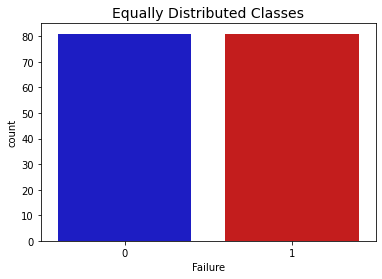

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Failure'].value_counts()/len(new_df))



sns.countplot('Failure', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# **Correlation Matrices**

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in failure of a machine. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

**Summary and Explanation:**

**Negative Correlations**: Humidity ,   Operator_Operator8, Measure8  and  'Hours Since Previous Failure' are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

**Positive Correlations**: Temperature ,  Operator_Operator7 ,  Measure7 , and  Measure10 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

**BoxPlots**: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

**Note**: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

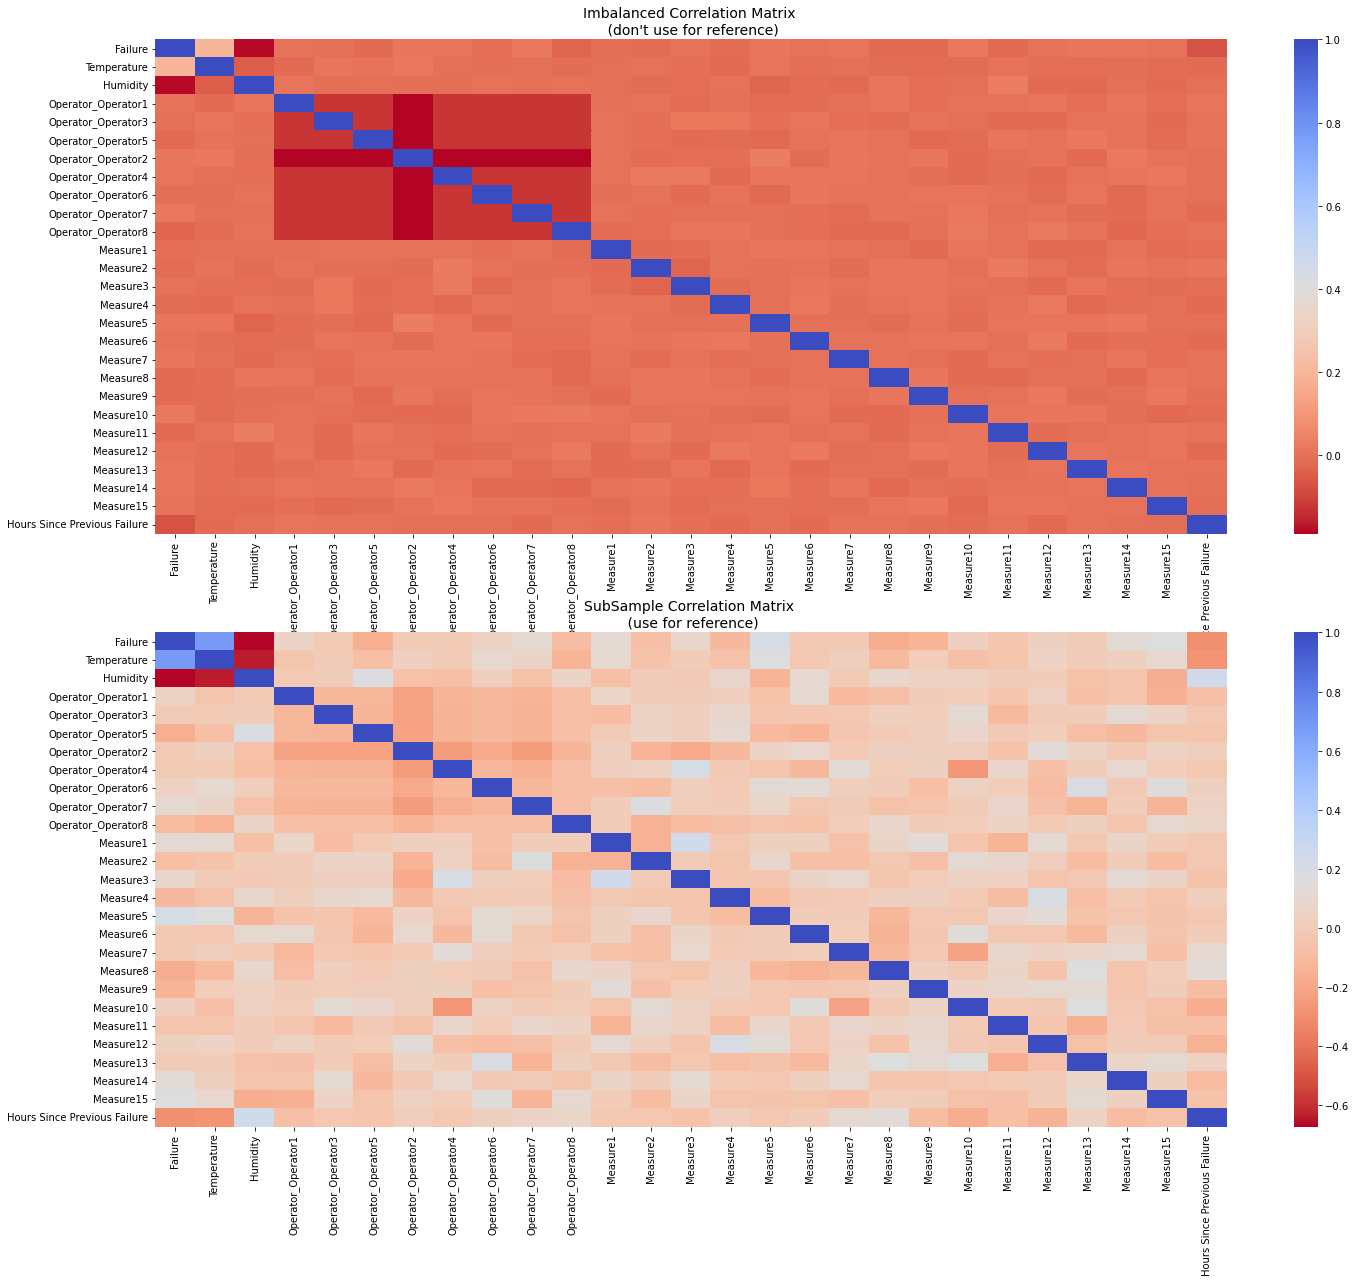

In [ ]:
# Making sure I use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df_encoded.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()


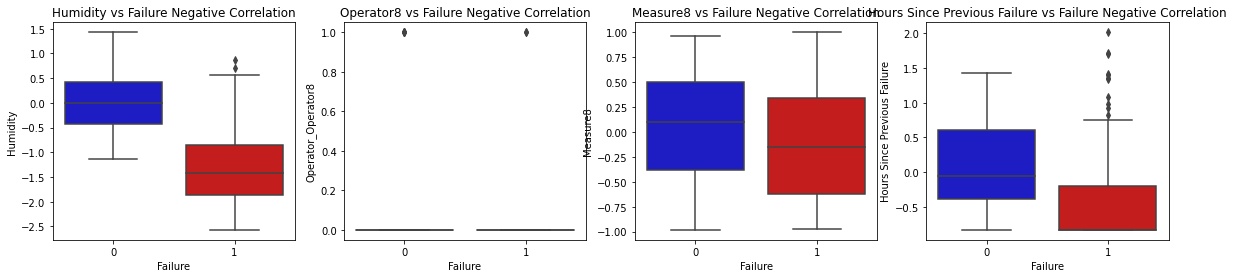

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a Failure in Operations)
sns.boxplot(x="Failure", y="Humidity", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Humidity vs Failure Negative Correlation')

sns.boxplot(x="Failure", y="Operator_Operator8", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Operator8 vs Failure Negative Correlation')


sns.boxplot(x="Failure", y="Measure8", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('Measure8 vs Failure Negative Correlation')


sns.boxplot(x="Failure", y="Hours Since Previous Failure", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('Hours Since Previous Failure vs Failure Negative Correlation')

plt.show()

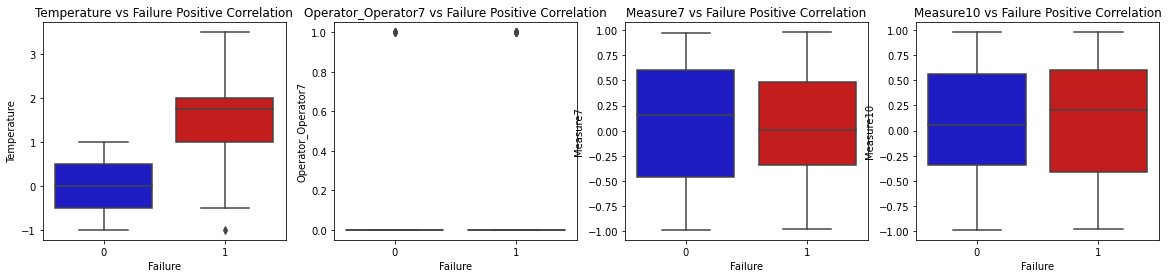

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Failure", y="Temperature", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Temperature vs Failure Positive Correlation')

sns.boxplot(x="Failure", y="Operator_Operator7", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Operator_Operator7 vs Failure Positive Correlation')


sns.boxplot(x="Failure", y="Measure7", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('Measure7 vs Failure Positive Correlation')


sns.boxplot(x="Failure", y="Measure10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('Measure10 vs Failure Positive Correlation')

plt.show()

# **Anomaly Detection**:


**Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.**


**Interquartile Range Method:**

**Interquartile Range (IQR)**: We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.

**Boxplots**: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).

**Outlier Removal Tradeoff**: We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.


**The Tradeoff**: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

**Summary**:
**Visualize Distributions**: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers.

**Determining the threshold**: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper 
extreme threshold).

**Conditional Dropping**: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.

**Boxplot Representation**: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.
Note: After implementing outlier reduction our accuracy has been improved. Some outliers can distort the accuracy of our models but remember, we have to avoid an extreme amount of information loss or else our model runs the risk of underfitting.

**Reference**: More information on Interquartile Range Method: How to Use Statistics to Identify Outliers in Data by Jason Brownless (Machine Learning Mastery blog)

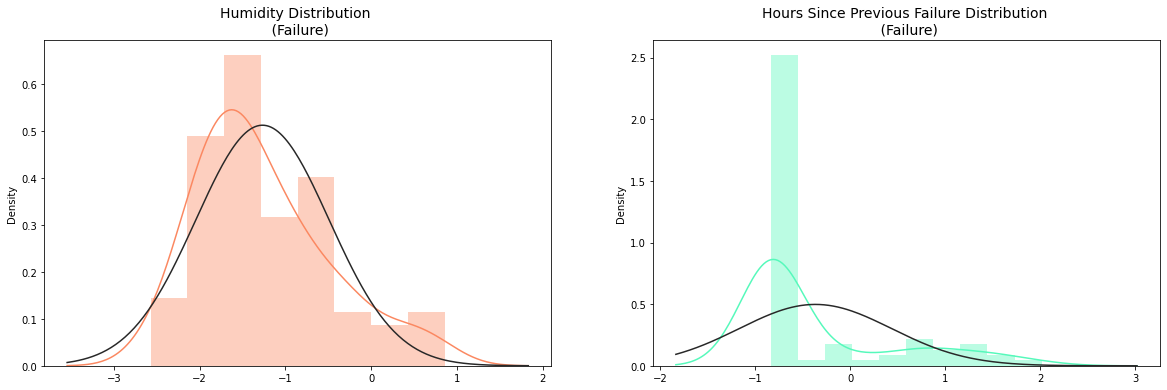

In [ ]:
from scipy.stats import norm

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

Humidity_failure_dist = new_df['Humidity'].loc[new_df['Failure'] == 1].values
sns.distplot(Humidity_failure_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Humidity Distribution \n (Failure)', fontsize=14)

Hours_Since_Previous_Failure_dist = new_df['Hours Since Previous Failure'].loc[new_df['Failure'] == 1].values
sns.distplot(Hours_Since_Previous_Failure_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Hours Since Previous Failure Distribution \n (Failure)', fontsize=14)

plt.show()

In [ ]:
print('Number of Instances before outliers removal: {} \n'.format(len(new_df)))


# # -----> Humidity Removing Outliers (Highest Negative Correlated with Labels)
Humidity_failure = new_df['Humidity'].loc[new_df['Failure'] == 1].values
q25, q75 = np.percentile(Humidity_failure, 32), np.percentile(Humidity_failure, 68)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
Humidity_iqr = q75 - q25
print('iqr: {}'.format(Humidity_iqr))

Humidity_cut_off = Humidity_iqr * 1.5
Humidity_lower, Humidity_upper = q25 - Humidity_cut_off, q75 + Humidity_cut_off
print('Cut Off: {}'.format(Humidity_cut_off))
print('Humidity Lower: {}'.format(Humidity_lower))
print('Humidity Upper: {}'.format(Humidity_upper))

outliers = [x for x in Humidity_failure if x < Humidity_lower or x > Humidity_upper]

#outliers=[]
#for ele in Humidity_failure:
#  if (ele > Humidity_upper or ele <Humidity_lower):
#    print(ele)
#    outliers.append(ele)
  

print('Feature Humidity Outliers for Failure Cases: {}'.format(len(outliers)))
print('Humidity outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[((new_df['Humidity'] > Humidity_upper) | (new_df['Humidity'] < Humidity_lower)) & (new_df['Failure'] == 1)].index)
print('----' * 44)




# -----> Hours Since Previous Failure removing outliers from fraud transactions
Hours_Since_Previous_Failure = new_df['Hours Since Previous Failure'].loc[new_df['Failure'] == 1].values
q25, q75 = np.percentile(Hours_Since_Previous_Failure, 30), np.percentile(Hours_Since_Previous_Failure, 70)
print('Quartile 30: {} | Quartile 70: {}'.format(q25, q75))
Hours_Since_Previous_Failure_iqr = q75 - q25
print('iqr: {}'.format(Hours_Since_Previous_Failure_iqr))

Hours_Since_Previous_Failure_cut_off = Hours_Since_Previous_Failure_iqr * 1.5
Hours_Since_Previous_Failure_lower, Hours_Since_Previous_Failure_upper = q25 - Hours_Since_Previous_Failure_cut_off, q75 + Hours_Since_Previous_Failure_cut_off
print('Cut Off: {}'.format(Hours_Since_Previous_Failure_cut_off))
print('Hours Since Previous Failure Lower: {}'.format(Hours_Since_Previous_Failure_lower))
print('Hours Since Previous Failure Upper: {}'.format(Hours_Since_Previous_Failure_upper))

outliers = [x for x in Hours_Since_Previous_Failure if x < Hours_Since_Previous_Failure_lower or x > Hours_Since_Previous_Failure_upper]
print('Hours Since Previous Failure outliers: {}'.format(outliers))
print('Feature Hours Since Previous Failure Outliers for Failure Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[((new_df['Hours Since Previous Failure'] > Hours_Since_Previous_Failure_upper) | (new_df['Hours Since Previous Failure'] < Hours_Since_Previous_Failure_lower)) & (new_df['Failure'] == 1)].index)
print('\nNumber of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

Number of Instances before outliers removal: 162 

Quartile 25: -1.7142857142857142 | Quartile 75: -1.085714285714285
iqr: 0.6285714285714292
Cut Off: 0.9428571428571438
Humidity Lower: -2.657142857142858
Humidity Upper: -0.14285714285714113
Feature Humidity Outliers for Failure Cases: 7
Humidity outliers:[0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.8571428571428571, 0.7142857142857143, 0.2857142857142857, 0.0]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 30: -0.8290598290598291 | Quartile 70: -0.7440170940170943
iqr: 0.08504273504273485
Cut Off: 0.12756410256410228
Hours Since Previous Failure Lower: -0.9566239316239313
Hours Since Previous Failure Upper: -0.6164529914529919
Hours Since Previous Failure outliers: [-0.19230769230769232, 0.9230769230769231, 0.43162393162393164, 0.8247863247863247, 0.7307692307692307, 0.6752136752

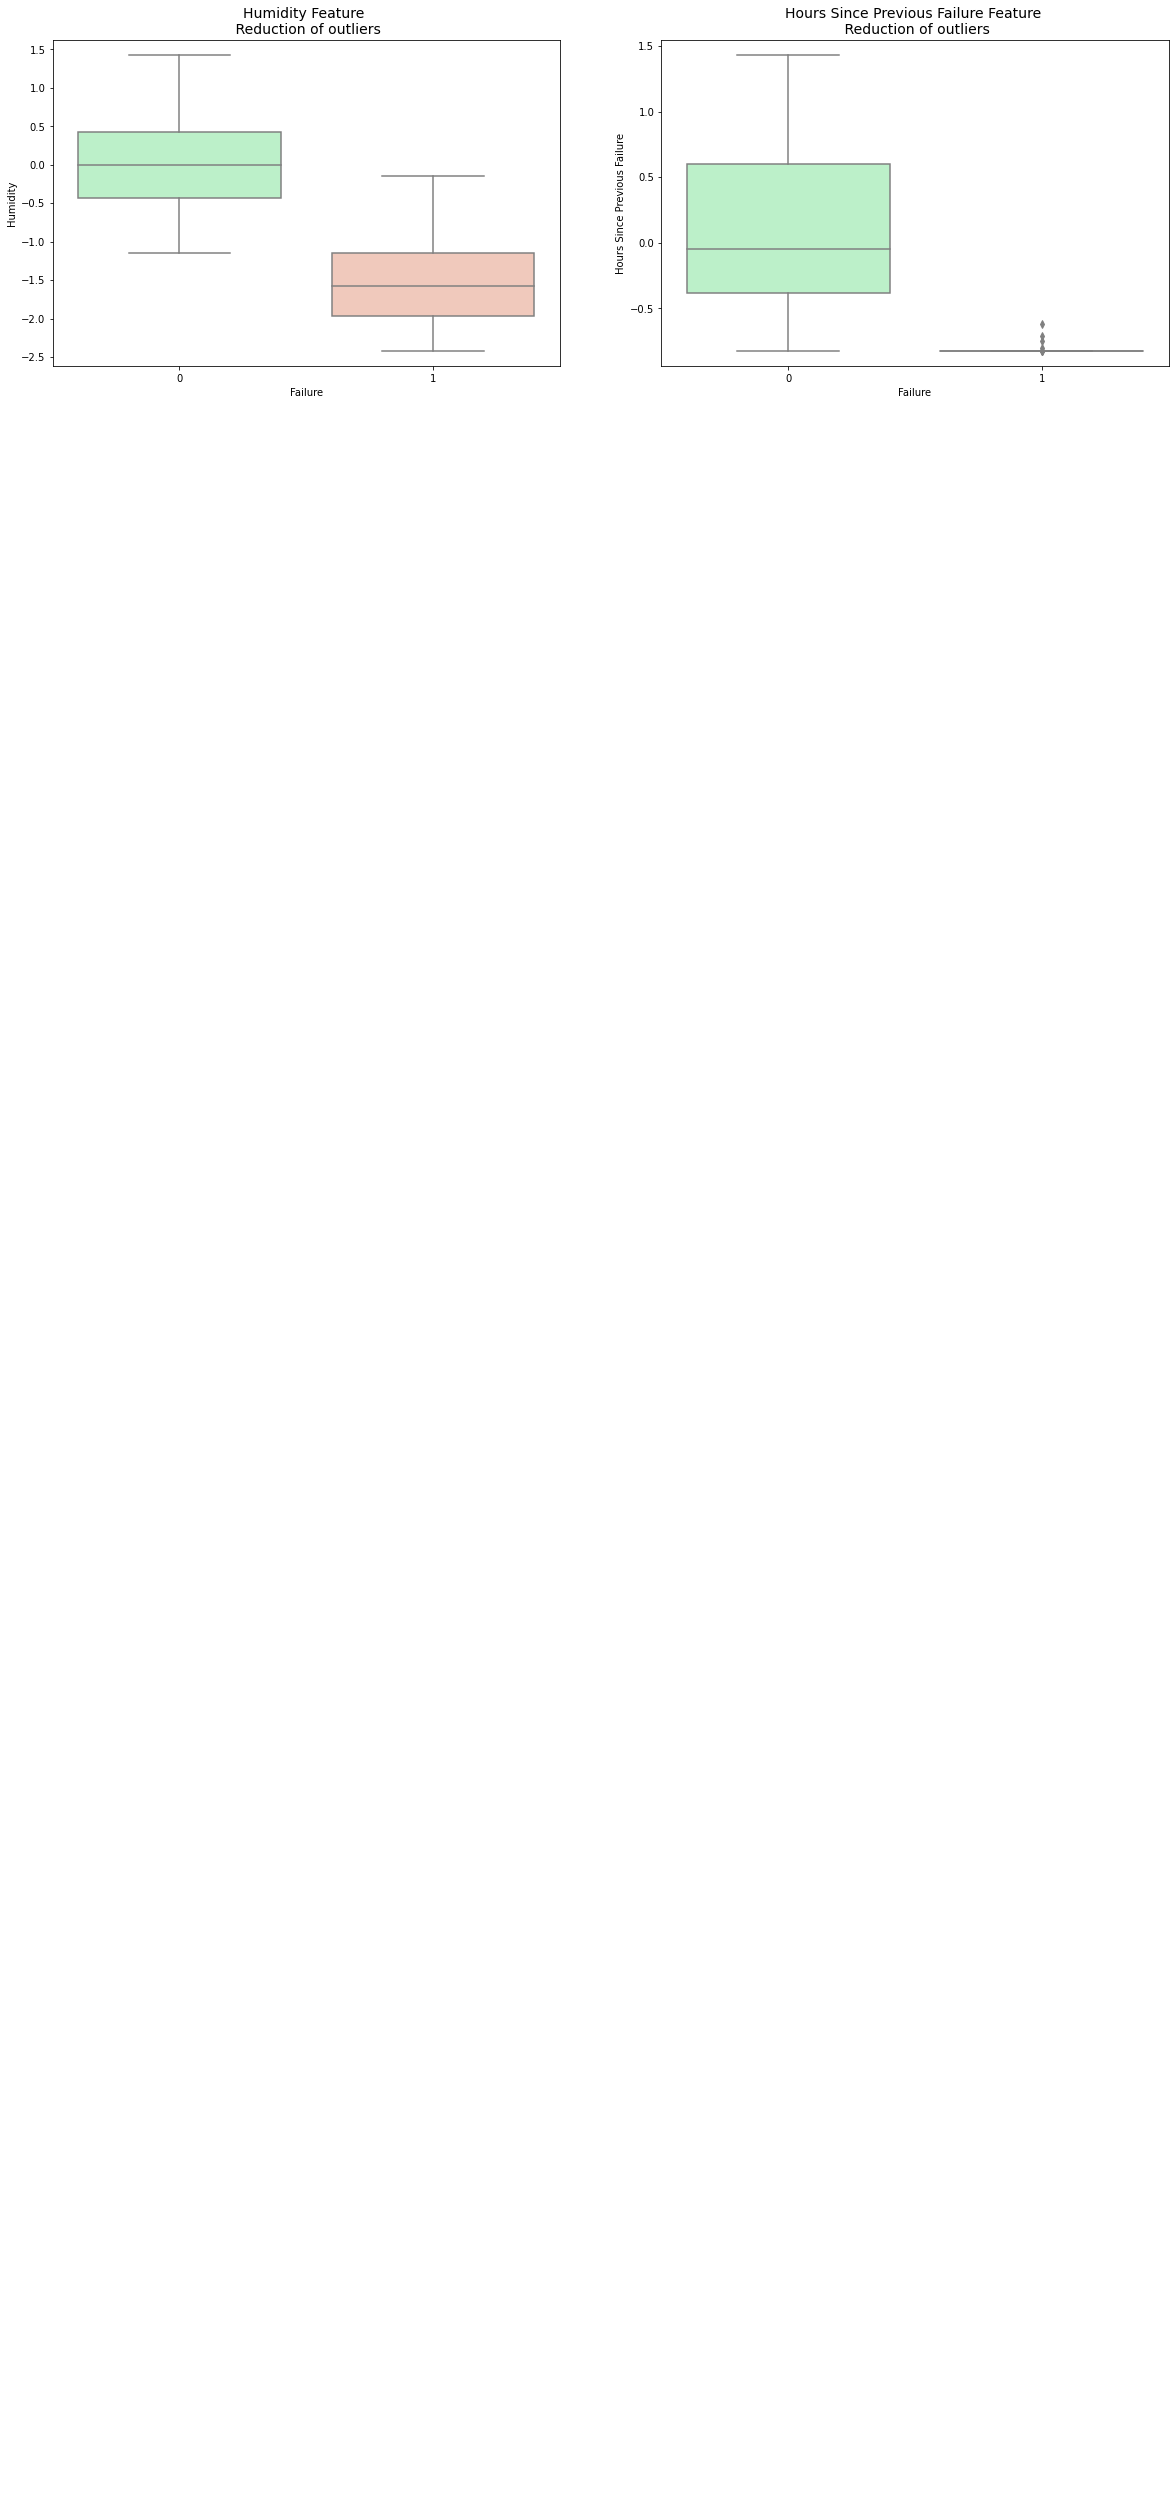

In [ ]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']

# Boxplots with outliers removed:
# Feature- Humidity
sns.boxplot(x="Failure", y="Humidity", data=new_df,ax=ax1, palette=colors)
ax1.set_title("Humidity Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature- Hours Since Previous Failure
sns.boxplot(x="Failure", y="Hours Since Previous Failure", data=new_df, ax=ax2, palette=colors)
ax2.set_title("Hours Since Previous Failure Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

# **Dimensionality Reduction and Clustering:**

## **Understanding t-SNE:**
**In order to understand this algorithm you have to understand the following terms:**
Euclidean Distance
Conditional Probability
Normal and T-Distribution Plots

**Note**: If you want a simple instructive video look at StatQuest: t-SNE, Clearly Explained by Joshua Starmer

**Summary**:
t-SNE algorithm can pretty accurately cluster the cases where there is  failure and non-failure in our dataset.

Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running t-SNE)

This gives us an indication that further predictive models will perform pretty well in separating failure cases from non-failure cases.

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Failure', axis=1)
y = new_df['Failure']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 0.79 s
PCA took 0.019 s
Truncated SVD took 0.0031 s


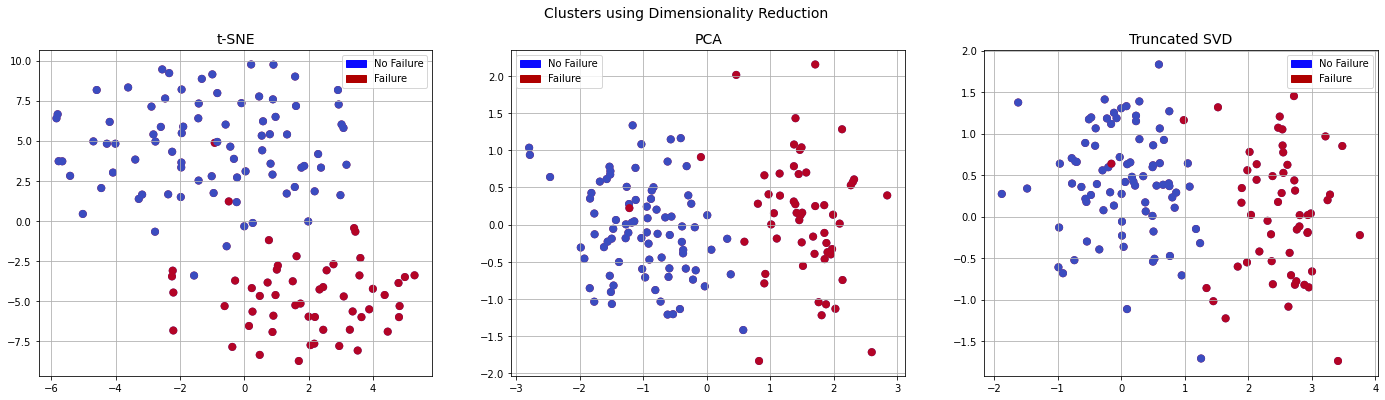

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Failure', 'Failure']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Failure')
red_patch = mpatches.Patch(color='#AF0000', label='Failure')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Failure', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Failure', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Failure', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Failure', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])


# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Failure', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Failure', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])


plt.show()

# **Classifiers (UnderSampling):**
In this section we will train four types of classifiers and decide which classifier will be more effective in detecting failure of machines. Before we have to split our data into training and testing sets and separate the features from the labels.

## **Summary**:

**Logistic Regression classifier** is more accurate than the other three classifiers in most cases. (We will further analyze Logistic Regression)
GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.

Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that LogisticRegression pretty accurately separates failure and non failure cases.

## **Learning Curves:**
The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (high variance).
If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias)

**Logistic Regression Classifier shows the best score in both training and cross-validating sets.**

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Failure', axis=1)
y = new_df['Failure']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier() }

In [ ]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 92.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 95.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  95.37%
Knears Neighbors Cross Validation Score 93.51%
Support Vector Classifier Cross Validation Score 96.28%
DecisionTree Classifier Cross Validation Score 93.51%


In [ ]:
# We will undersample during cross validating
undersample_X = df_encoded.drop('Failure', axis=1)
undersample_y = df_encoded['Failure']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []


#Implementing NearMiss Technique 
#Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))


# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [1757 1758 1759 ... 8781 8782 8783] Test: [   0    1    2 ... 1754 1755 1756]
Train: [   0    1    2 ... 8781 8782 8783] Test: [1757 1758 1759 ... 3528 3559 3590]
Train: [   0    1    2 ... 8781 8782 8783] Test: [3511 3512 3513 ... 5268 5269 5319]
Train: [   0    1    2 ... 8781 8782 8783] Test: [5270 5271 5272 ... 7029 7030 7031]
Train: [   0    1    2 ... 7029 7030 7031] Test: [6692 6748 6811 ... 8781 8782 8783]
NearMiss Label Distribution: Counter({0: 81, 1: 81})


In [ ]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

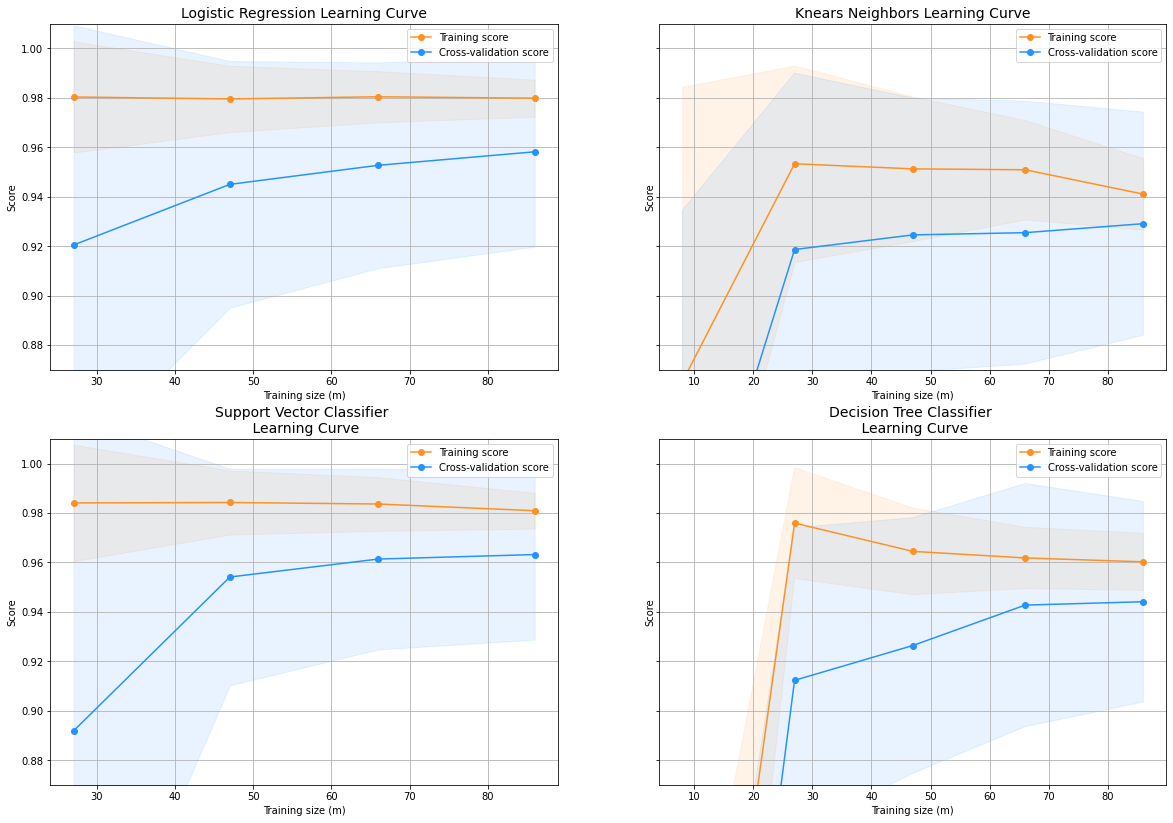

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9825994318181819
KNears Neighbors:  0.9240056818181819
Support Vector Classifier:  0.984375
Decision Tree Classifier:  0.9275568181818181


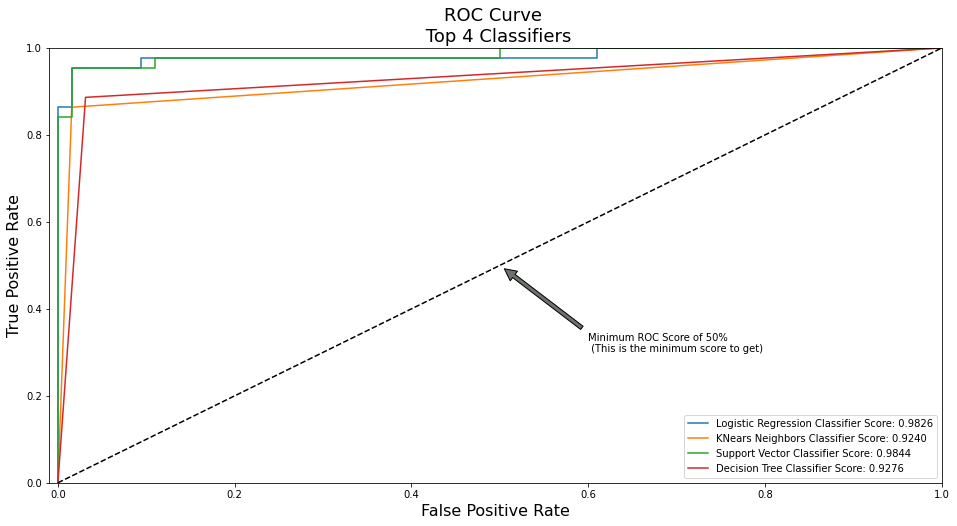

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


y_pred = log_reg.predict(X_train)
y_pred2 = knears_neighbors.predict(X_train)
y_pred3 = svc.predict(X_train)
y_pred4 = tree_clf.predict(X_train)


# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred2)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred2)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred2)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred2)))
print('---' * 45)

print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred3)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred3)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred3)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred3)))
print('---' * 45)

print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred4)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred4)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred4)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred4)))
print('---' * 45)
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.95
Precision Score: 0.91
F1 Score: 0.93
Accuracy Score: 0.94
---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.89
Precision Score: 0.95
F1 Score: 0.92
Accuracy Score: 0.94
---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.95
Precision Score: 1.00
F1 Score: 0.98
Accuracy Score: 0.98
---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.91
Precision Score: 0.98
F1 Score: 0.94
Accuracy Score: 0.95
----------------------------------------------------------------------------------------

# **A Deeper Look into LogisticRegression:**
In this section we will ive a deeper look into the logistic regression classifier.

**Terms:**

**True Positives**: Correctly Classified Failure in  machine

**False Positives**: Incorrectly Classified Failure in machine

**True Negative**: Correctly Classified No failure in machine

**False Negative**: Incorrectly Classified No failure in machine

**Precision**: True Positives/(True Positives + False Positives)

**Recall**: True Positives/(True Positives + False Negatives)

**Precision** as the name says, says how precise (how sure) is our model in detecting failured machine while recall is the amount of failure cases our model is able to detect.

**Precision/Recall Tradeoff**: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 failured cases in which the model is 95% precise or more that these are failured cases. Then let's say there are 5 more cases that our model considers 90% to be a failured case, if we lower the precision there are more cases that our model will be able to detect.

## **Summary**:
Precision starts to descend between 0.90 and 0.92 nevertheless, our precision score is still pretty high and still we have a descent recall score.

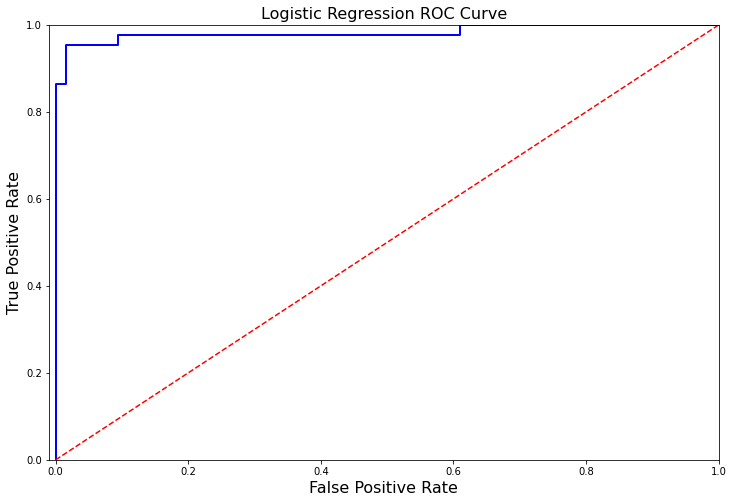

In [ ]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)


# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)


# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.95
Precision Score: 0.91
F1 Score: 0.93
Accuracy Score: 0.94
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.96
Precision Score: 0.01
Recall Score: 0.03
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [ ]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.56


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.56')

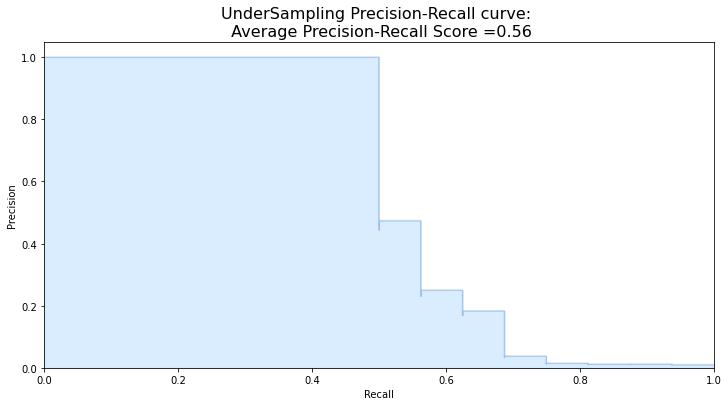

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

**The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.**

SMOTE Technique (Over-Sampling):
<img src="https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png", width=800> SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".


Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.
Cross Validation Overfitting Mistake:
Overfitting during Cross Validation:
In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. In the following section you will see amazing precision and recall scores but in reality our data is overfitting!

The Wrong Way:


As mentioned previously, if we get the minority class ("failure") in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below:

The Right Way:

As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
log_reg_sm = grid_log_reg.best_estimator_
#log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 7028 | Length of y (train): 7028
Length of X (test): 1756 | Length of y (test): 1756
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9271659334929611
precision: 0.22417459020796632
recall: 0.8
f1: 0.30702199567455246
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['No Failure', 'Failure']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

  No Failure       1.00      0.91      0.95      1740
     Failure       0.06      0.56      0.10        16

    accuracy                           0.91      1756
   macro avg       0.53      0.74      0.53      1756
weighted avg       0.99      0.91      0.94      1756



In [ ]:
y_score = best_est.decision_function(original_Xtest)

In [ ]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.40


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.40')

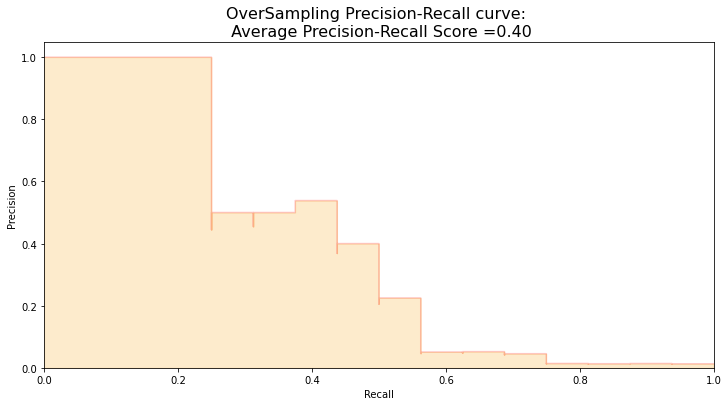

In [ ]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

Test Data with Logistic Regression:¶

Confusion Matrix:
Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" (No failure occured) class.


False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No"(No failure occured) class.


False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" (Failure occured) class


True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" (Failure occured) class.

Summary:
Random UnderSampling: We will evaluate the final performance of the classification models in the random undersampling subset. Keep in mind that this is not the data from the original dataframe.
Classification Models: The models that performed the best were logistic regression and support vector classifier (SVM)

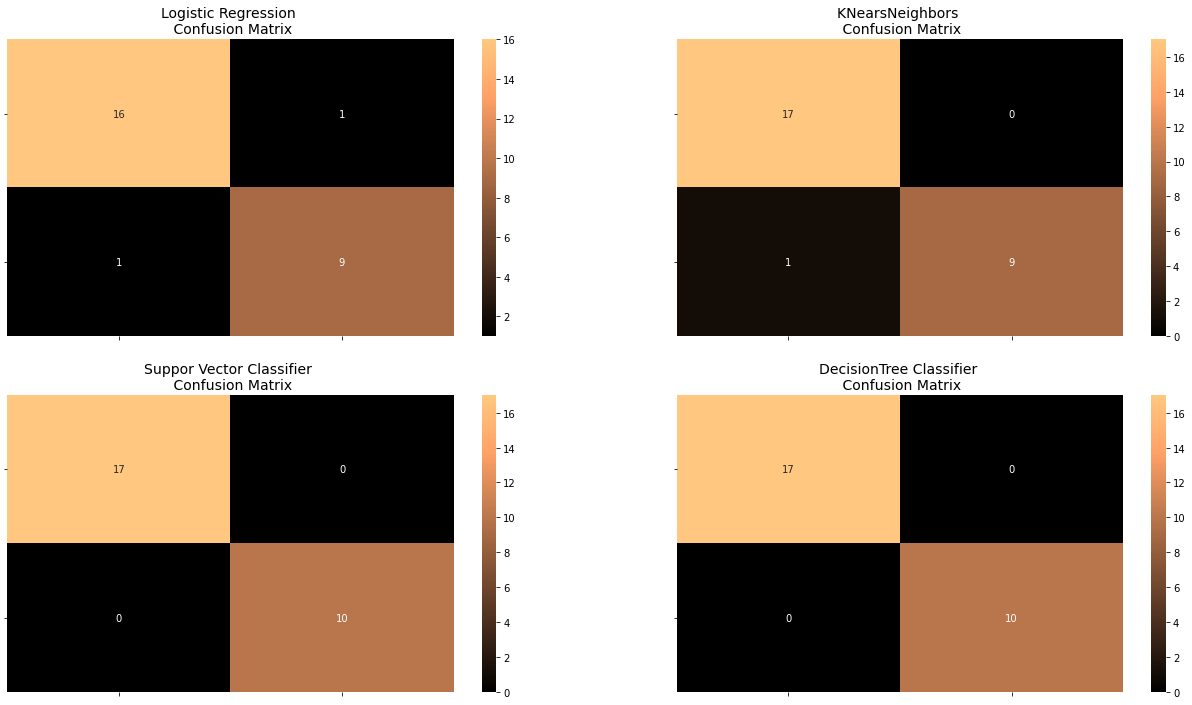

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [ ]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.90      0.90      0.90        10

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.90      0.95        10

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        10

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Accuracy Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Accuracy Score']
final_df.drop('Accuracy Score', axis=1, inplace=True)
final_df.insert(1, 'Accuracy Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Accuracy Score
0,Random UnderSampling,0.925926
1,Oversampling (SMOTE),0.908314


Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):
In this section we will implement a simple Neural Network (with one hidden layer) in order to see which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting failure and no failure machine.


Our Main Goal:
Our main goal is to explore how our simple neural network behaves in both the random undersample and oversample dataframes and see whether they can predict accuractely both non-failure and failure cases. Why not only focus on failure?
 Imagine you were a cardholder and after you purchased an item your card gets blocked because the bank's algorithm thought your purchase was a fraud. That's why we shouldn't emphasize only in detecting fraud cases but we should also emphasize correctly categorizing non-fraud transactions.

The Confusion Matrix:
Here is again, how the confusion matrix works:

Upper Left Square: The amount of correctly classified by our model of no failure in machine
Upper Right Square: The amount of incorrectly classified machine as failure ones, but the actual label is no failure.
Lower Left Square: The amount of incorrectly classified machine as non failured ones, but the actual label is failure .
Lower Right Square: The amount of correctly classified by our model of failured machine.
Summary (Keras || Random UnderSampling):
Dataset: In this final phase of testing we will fit this model in both the random undersampled subset and oversampled dataset (SMOTE) in order to predict the final result using the original dataframe testing data.
Neural Network Structure: As stated previously, this will be a simple model composed of one input layer (where the number of nodes equals the number of features) plus bias node, one hidden layer with 32 nodes and one output node composed of two possible results 0 or 1 (No failure or failure).
Other characteristics: The learning rate will be 0.001, the optimizer we will use is the AdamOptimizer, the activation function that is used in this scenario is "Relu" and for the final outputs we will use sparse categorical cross entropy, which gives the probability whether an instance case is no failure or failure (The prediction will pick the highest probability between the two.)


In [ ]:
import keras

from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 32)                864       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,632
Trainable params: 1,632
Non-trainable params: 0
_________________________________________________________________


In [ ]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
4/4 - 2s - loss: 0.9752 - accuracy: 0.6047 - val_loss: 0.9383 - val_accuracy: 0.5000 - 2s/epoch - 394ms/step
Epoch 2/20
4/4 - 0s - loss: 0.8929 - accuracy: 0.6047 - val_loss: 0.8760 - val_accuracy: 0.5000 - 94ms/epoch - 23ms/step
Epoch 3/20
4/4 - 0s - loss: 0.8219 - accuracy: 0.6047 - val_loss: 0.8201 - val_accuracy: 0.5000 - 97ms/epoch - 24ms/step
Epoch 4/20
4/4 - 0s - loss: 0.7682 - accuracy: 0.6047 - val_loss: 0.7704 - val_accuracy: 0.5000 - 40ms/epoch - 10ms/step
Epoch 5/20
4/4 - 0s - loss: 0.7193 - accuracy: 0.6163 - val_loss: 0.7303 - val_accuracy: 0.5455 - 93ms/epoch - 23ms/step
Epoch 6/20
4/4 - 0s - loss: 0.6802 - accuracy: 0.6279 - val_loss: 0.6970 - val_accuracy: 0.5455 - 55ms/epoch - 14ms/step
Epoch 7/20
4/4 - 0s - loss: 0.6443 - accuracy: 0.6512 - val_loss: 0.6705 - val_accuracy: 0.5909 - 39ms/epoch - 10ms/step
Epoch 8/20
4/4 - 0s - loss: 0.6122 - accuracy: 0.6860 - val_loss: 0.6493 - val_accuracy: 0.6364 - 67ms/epoch - 17ms/step
Epoch 9/20
4/4 - 0s - loss: 0.584

In [ ]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [ ]:
#undersample_fraud_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = np.argmax(undersample_model.predict(original_Xtest, batch_size=200, verbose=0), axis=-1)

In [ ]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1583  157]
 [   5   11]]
Confusion matrix, without normalization
[[1740    0]
 [   0   16]]


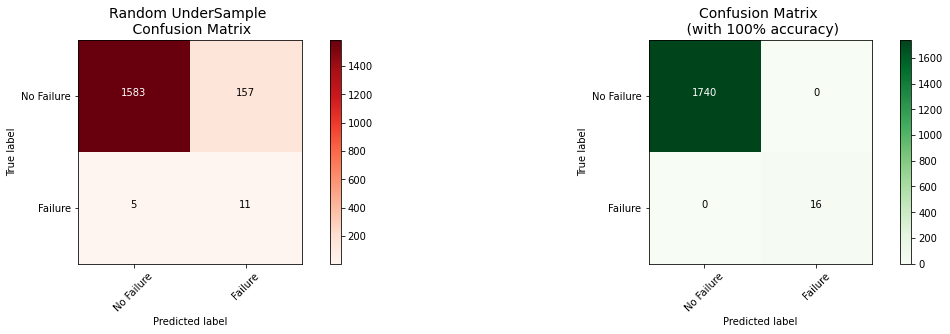

In [ ]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Failure', 'Failure']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)